In [1]:
# Standard Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Natural Language Tool Kit, Regex, unicodedata for manipulation of language
import nltk
import unicodedata
import re
# Our code specific for this project
from prepare import git_df
from acquire import git_data
from explore import code_language, other_languages, word_counts
# Text/Display Formatting
from formating import bold, display, Latex, Markdown, percent, Percent, strike, underline
# Spell Checking and Visualization
from textblob import TextBlob
from wordcloud import WordCloud
import PIL
import os
# plt presets
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = git_df()

In [3]:
df[df.language.isnull() == True]

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean


In [4]:
df.head(1)

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             600 non-null    object
 1   language         600 non-null    object
 2   original         600 non-null    object
 3   clean            600 non-null    object
 4   stemmed          600 non-null    object
 5   lemmatized       600 non-null    object
 6   original_length  600 non-null    int64 
 7   true_clean       600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


### No non nulls in the finished dataframe!!
- Let's split this to ask some real questions

In [6]:
df.language.unique()

array(['Python', 'C#', 'JavaScript', 'C', 'C++', 'Java', 'PHP',
       'Jupyter Notebook', 'HTML', 'TypeScript'], dtype=object)

In [7]:
df = other_languages(df)

In [8]:
df.language.unique()

array(['Python', 'Other', 'C', 'C++', 'PHP', 'HTML'], dtype=object)

## What is the probability of guessing one right if we know nothing other than the categories?
- $1/6$ 

In [9]:
percent(1/6)

16.67%

## What is the probability of guessing correctly if we use the probability from our sample?
- Gotta split this data up first, however I will be stratifying by the language, so the approximate proportions should be similar


In [10]:
from prepare import split_data

In [11]:
train, validate, test = split_data(df, 'language')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 347 to 211
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             360 non-null    object
 1   language         360 non-null    object
 2   original         360 non-null    object
 3   clean            360 non-null    object
 4   stemmed          360 non-null    object
 5   lemmatized       360 non-null    object
 6   original_length  360 non-null    int64 
 7   true_clean       360 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.3+ KB


### Great! Looks like we have a good Training set with 360 rows
- Let's make a language bank from our code_language class

In [13]:
lb = code_language.make_language_bank(train)

In [14]:
lb['C'].label

'C'

In [25]:
###----  Only run this cell if you  ----###
###----  want to see all the words  ----###
###----  in the readme's of all the ----###
###----       C repostiories        ----###

# lb['C'].words

In [18]:
lb['Python'].freq()

python          1393
file             661
code             546
star             527
model            405
                ... 
axiom              1
acknowledge        1
citizen            1
bureaucratic       1
ridge              1
Length: 4568, dtype: int64

In [17]:
word_counts(lb)

,python,html,c,c++,php,other,all
python,1393,20,45,185,33,133,1809
file,661,122,316,227,198,166,1690
code,546,155,198,211,149,301,1560
star,527,11,2,6,8,9,563
model,405,46,15,62,71,190,789
...,...,...,...,...,...,...,...
shama,0,0,0,0,0,1,1
perfected,0,0,0,0,0,1,1
rent,0,0,0,0,0,1,1
coloring,0,0,0,0,0,1,1


<AxesSubplot:>

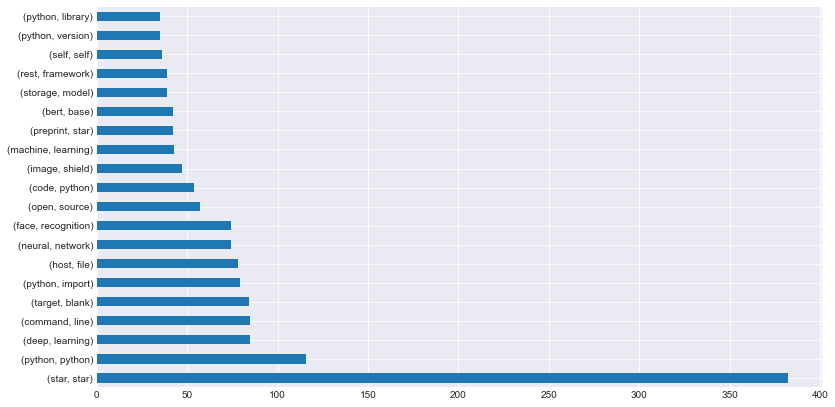

In [22]:
lb['Python'].bigrams().value_counts(ascending=False).head(20).plot.barh()